# ML_SP22_Project_3 (CNN)

### Due Date: 5/16 23:59 pm

In [1]:
import sys
import os
import platform 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing import image

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

### The goal for this Project is to practice running CNN using a set of dog and cat image

***Make sure you fill in the blank inside the TODO section and try at least two different choices for the following parameters. Summarize your findings briefly at the end of the notebook***

1. Define a first model, try two epoch choices and two batch size.
2. Add dropout to the first model to see if it helps or not, pick one of the epoch and batch size you had before
3. Try a second model with slighly different model arhitecture
4. Summarize your findings

### Loading the datasets

In [4]:
# download the dogsvscats.zip, save it under your notebook directory
# or somewhere else, change base_dir to where you save the datasets
base_dir = "./dogsvscats"

In [5]:
train_dataset = image_dataset_from_directory(
         os.path.join(base_dir, "train"),
        image_size=(180, 180),
        batch_size=32)

Found 2000 files belonging to 2 classes.


2022-05-16 21:25:03.794379: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-16 21:25:03.919462: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-05-16 21:25:03.919514: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-05-16 21:25:03.945393: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

In [6]:
validation_dataset = image_dataset_from_directory(
        os.path.join(base_dir, "validation"),
        image_size=(180, 180),
        batch_size=32)

Found 1000 files belonging to 2 classes.


In [7]:
test_dataset = image_dataset_from_directory(
        os.path.join(base_dir, "test"),
        image_size=(180, 180),
        batch_size=1000)

Found 1000 files belonging to 2 classes.


In [8]:
images, labels = list(train_dataset.take(1))[0]
class_names = train_dataset.class_names

Text(0.5, 1.0, 'dog')

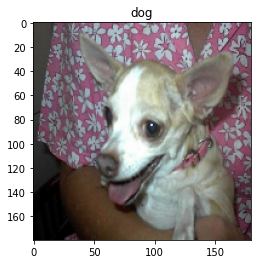

In [9]:
idx = 2
plt.imshow(images[idx].numpy().astype("uint8"))
plt.title(class_names[labels[idx].numpy()])

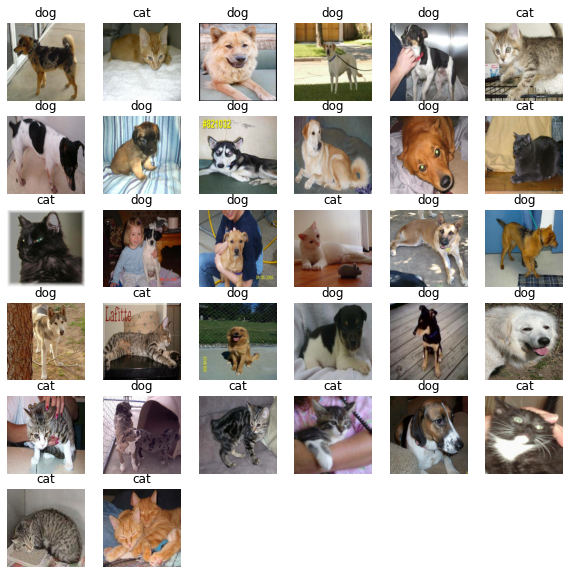

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(32):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i].numpy()])
    plt.axis("off")

# Plotting the images
plt.show()

### Define your first CNN model

In [11]:
# TODO: fill in the blank
inputs = keras.Input(shape=(180, 180, 3))

x = inputs

x = layers.Rescaling(1./255)(inputs)
x = layers.BatchNormalization()(x)

x = Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)

x = Flatten()(x)
outputs = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inputs, outputs=outputs)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496 

### Comiple the model

In [13]:
model.compile(optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])

### Running the first model

In [14]:
history = model.fit(
    train_dataset,
    epochs=64, 
    validation_data=validation_dataset)

Epoch 1/64
63/63 [==============================] - 54s 848ms/step - loss: 1.3255 - accuracy: 0.5630 - val_loss: 0.6817 - val_accuracy: 0.5130
Epoch 2/64
63/63 [==============================] - 51s 817ms/step - loss: 0.6387 - accuracy: 0.6545 - val_loss: 0.6284 - val_accuracy: 0.6350
Epoch 3/64
63/63 [==============================] - 51s 809ms/step - loss: 0.5482 - accuracy: 0.7340 - val_loss: 0.5809 - val_accuracy: 0.6870
Epoch 4/64
63/63 [==============================] - 51s 808ms/step - loss: 0.4192 - accuracy: 0.8105 - val_loss: 0.6347 - val_accuracy: 0.6850
Epoch 5/64
63/63 [==============================] - 53s 840ms/step - loss: 0.2777 - accuracy: 0.8875 - val_loss: 0.7181 - val_accuracy: 0.6970
Epoch 6/64
63/63 [==============================] - 52s 833ms/step - loss: 0.1767 - accuracy: 0.9385 - val_loss: 0.8227 - val_accuracy: 0.6980
Epoch 7/64
63/63 [==============================] - 52s 835ms/step - loss: 0.0882 - accuracy: 0.9690 - val_loss: 1.3274 - val_accuracy: 0.7100

63/63 [==============================] - 47s 755ms/step - loss: 2.3109e-10 - accuracy: 1.0000 - val_loss: 6.8011 - val_accuracy: 0.6970
Epoch 58/64
63/63 [==============================] - 49s 778ms/step - loss: 2.1037e-10 - accuracy: 1.0000 - val_loss: 6.8014 - val_accuracy: 0.6950
Epoch 59/64
63/63 [==============================] - 50s 796ms/step - loss: 1.6783e-10 - accuracy: 1.0000 - val_loss: 6.8222 - val_accuracy: 0.6980
Epoch 60/64
63/63 [==============================] - 50s 797ms/step - loss: 3.3971e-10 - accuracy: 1.0000 - val_loss: 6.8306 - val_accuracy: 0.6990
Epoch 61/64
63/63 [==============================] - 54s 863ms/step - loss: 2.9414e-10 - accuracy: 1.0000 - val_loss: 6.8698 - val_accuracy: 0.6980
Epoch 62/64
63/63 [==============================] - 53s 846ms/step - loss: 1.3120e-10 - accuracy: 1.0000 - val_loss: 6.8782 - val_accuracy: 0.6980
Epoch 63/64
63/63 [==============================] - 53s 843ms/step - loss: 9.5032e-11 - accuracy: 1.0000 - val_loss: 6.8955

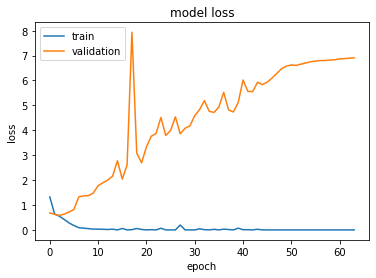

In [15]:
# summarize history for los
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

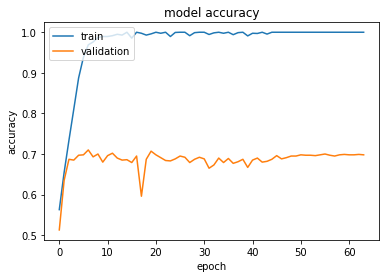

In [16]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Now, look at the testing dataset

In [17]:
test_images, test_labels = list(test_dataset.take(1))[0]

In [18]:
class_names

['cat', 'dog']

***Predict one image at a time***

Text(0.5, 1.0, 'dog')

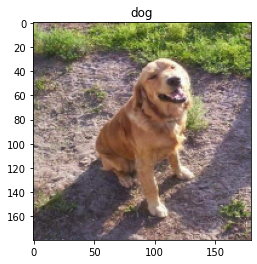

In [19]:
idx = 50
plt.imshow(test_images[idx].numpy().astype("uint8"))
plt.title(class_names[test_labels[idx].numpy()])

In [20]:
img = test_images[idx]
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

In [21]:
print(img_array.shape)
print(img_batch.shape)

(180, 180, 3)
(1, 180, 180, 3)


In [22]:
prediction = model.predict(img_batch)

In [23]:
print(prediction)

[[1.]]


### Evaluate your first model out-of-sample

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 109ms/step - loss: 7.2375 - accuracy: 0.6750
Test accuracy: 0.675


### Same model with the use of dropout

In [25]:
inputs = keras.Input(shape=(180, 180, 3))

x = inputs

x = layers.Rescaling(1./255)(inputs)
x = layers.Dropout(0.2)(x)
x = layers.BatchNormalization()(x)


x = Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)

x = Flatten()(x)
outputs = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inputs, outputs=outputs)

In [26]:
model.compile(optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])

In [27]:
history = model.fit(
    train_dataset,
    epochs=64, 
    validation_data=validation_dataset)

Epoch 1/64
63/63 [==============================] - 50s 793ms/step - loss: 1.2276 - accuracy: 0.5135 - val_loss: 0.6929 - val_accuracy: 0.5150
Epoch 2/64
63/63 [==============================] - 52s 826ms/step - loss: 0.7325 - accuracy: 0.5460 - val_loss: 0.6892 - val_accuracy: 0.5810
Epoch 3/64
63/63 [==============================] - 48s 756ms/step - loss: 0.6992 - accuracy: 0.6165 - val_loss: 0.6639 - val_accuracy: 0.5990
Epoch 4/64
63/63 [==============================] - 40s 642ms/step - loss: 0.6154 - accuracy: 0.6790 - val_loss: 0.6390 - val_accuracy: 0.6270
Epoch 5/64
63/63 [==============================] - 42s 675ms/step - loss: 0.5346 - accuracy: 0.7415 - val_loss: 0.6326 - val_accuracy: 0.6510
Epoch 6/64
63/63 [==============================] - 53s 849ms/step - loss: 0.4275 - accuracy: 0.7965 - val_loss: 0.8367 - val_accuracy: 0.6010
Epoch 7/64
63/63 [==============================] - 44s 706ms/step - loss: 0.3193 - accuracy: 0.8605 - val_loss: 0.7734 - val_accuracy: 0.6430

Epoch 58/64
63/63 [==============================] - 51s 810ms/step - loss: 8.0112e-06 - accuracy: 1.0000 - val_loss: 6.7694 - val_accuracy: 0.6160
Epoch 59/64
63/63 [==============================] - 51s 812ms/step - loss: 8.3373e-06 - accuracy: 1.0000 - val_loss: 7.9492 - val_accuracy: 0.6130
Epoch 60/64
63/63 [==============================] - 49s 781ms/step - loss: 0.1371 - accuracy: 0.9915 - val_loss: 6.8606 - val_accuracy: 0.6210
Epoch 61/64
63/63 [==============================] - 54s 853ms/step - loss: 3.2683e-06 - accuracy: 1.0000 - val_loss: 7.0368 - val_accuracy: 0.6240
Epoch 62/64
63/63 [==============================] - 50s 794ms/step - loss: 2.7058e-06 - accuracy: 1.0000 - val_loss: 7.7855 - val_accuracy: 0.6150
Epoch 63/64
63/63 [==============================] - 52s 827ms/step - loss: 0.0077 - accuracy: 0.9990 - val_loss: 7.0607 - val_accuracy: 0.6190
Epoch 64/64
63/63 [==============================] - 55s 879ms/step - loss: 0.0243 - accuracy: 0.9970 - val_loss: 9.7288

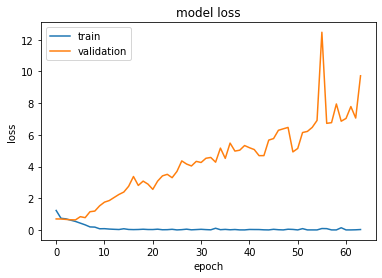

In [28]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

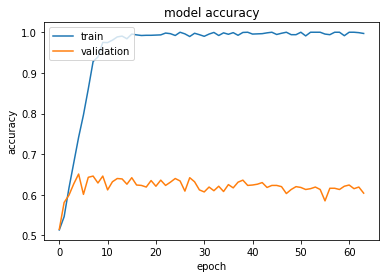

In [29]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [31]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 101ms/step - loss: 9.7824 - accuracy: 0.6140
Test accuracy: 0.614


### Try different choices of epoch, batch size for your first model

In [38]:
inputs = keras.Input(shape=(180, 180, 3))

x = inputs

x = layers.Rescaling(1./255)(inputs)
x = layers.BatchNormalization()(x)


x = Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)

x = Flatten()(x)
outputs = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inputs, outputs=outputs)

In [39]:
model.compile(optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])

In [40]:
# increase epochs
history = model.fit(
    train_dataset,
    epochs=8, 
    batch_size=16,
    validation_data=validation_dataset)

Epoch 1/8
63/63 [==============================] - 43s 666ms/step - loss: 1.1535 - accuracy: 0.5625 - val_loss: 0.6801 - val_accuracy: 0.6390
Epoch 2/8
63/63 [==============================] - 42s 666ms/step - loss: 0.6316 - accuracy: 0.6555 - val_loss: 0.6657 - val_accuracy: 0.6050
Epoch 3/8
63/63 [==============================] - 48s 764ms/step - loss: 0.5446 - accuracy: 0.7315 - val_loss: 0.6490 - val_accuracy: 0.6410
Epoch 4/8
63/63 [==============================] - 41s 649ms/step - loss: 0.4335 - accuracy: 0.8040 - val_loss: 0.6200 - val_accuracy: 0.6620
Epoch 5/8
63/63 [==============================] - 49s 784ms/step - loss: 0.2902 - accuracy: 0.8725 - val_loss: 0.7038 - val_accuracy: 0.6800
Epoch 6/8
63/63 [==============================] - 42s 669ms/step - loss: 0.1774 - accuracy: 0.9305 - val_loss: 0.8549 - val_accuracy: 0.6920
Epoch 7/8
63/63 [==============================] - 47s 751ms/step - loss: 0.1133 - accuracy: 0.9585 - val_loss: 1.2340 - val_accuracy: 0.6680
Epoch 

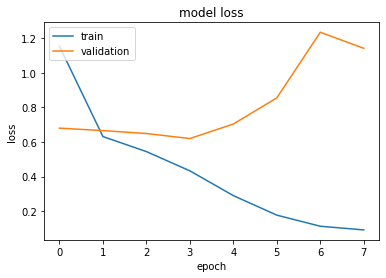

In [41]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

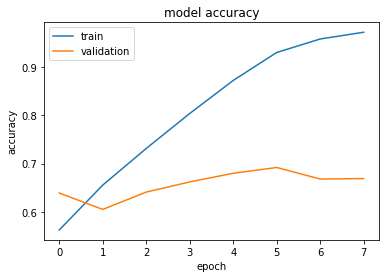

In [42]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [43]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 101ms/step - loss: 1.1932 - accuracy: 0.6780
Test accuracy: 0.678


### Try a second model with slightly different architecture (no need to be very complicated)

In [59]:
inputs = keras.Input(shape=(180, 180, 3))

x = inputs

x = layers.Rescaling(1./255)(inputs)
x = layers.BatchNormalization()(x)

x = Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)

x = Flatten()(x)
outputs = Dense(1, activation="sigmoid")(x)
model2 = Model(inputs=inputs, outputs=outputs)

In [60]:
model2.compile(optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"])

In [ ]:
# increase epochs
history = model2.fit(
    train_dataset,
    epochs=32,
    validation_data=validation_dataset)

Epoch 1/32
63/63 [==============================] - 48s 752ms/step - loss: 0.6758 - accuracy: 0.5820 - val_loss: 0.6805 - val_accuracy: 0.5410
Epoch 2/32
63/63 [==============================] - 43s 677ms/step - loss: 0.6055 - accuracy: 0.6665 - val_loss: 0.6311 - val_accuracy: 0.6620
Epoch 3/32
63/63 [==============================] - 41s 653ms/step - loss: 0.5200 - accuracy: 0.7330 - val_loss: 0.6070 - val_accuracy: 0.6620
Epoch 4/32
63/63 [==============================] - 43s 689ms/step - loss: 0.4820 - accuracy: 0.7625 - val_loss: 0.5708 - val_accuracy: 0.7030
Epoch 5/32
63/63 [==============================] - 43s 678ms/step - loss: 0.3888 - accuracy: 0.8295 - val_loss: 0.5771 - val_accuracy: 0.7000
Epoch 6/32
63/63 [==============================] - 42s 667ms/step - loss: 0.3191 - accuracy: 0.8650 - val_loss: 0.6435 - val_accuracy: 0.7080
Epoch 7/32
63/63 [==============================] - 44s 708ms/step - loss: 0.2593 - accuracy: 0.8930 - val_loss: 0.7312 - val_accuracy: 0.6950

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
test_images, test_labels = list(test_dataset.take(1))[0]

In [ ]:
# TODO test your second model on out-of-sample data
test_loss, test_acc = model2.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

### Summarize your findings below

#### Observations:
Adding dropout into the first model doesn't seem to help for accuracy. In fact, the usage of it seems to hinder the model's performance. The original model doesn't seem to suffer from overfitting which tells me that dropout isn't essential for this scenario.

For the third model, I reduced both the epochs and batch size. From the out-of-model samples, the accuracy doesn't seem to change much from the first model's if not slightly better. However, because the x-axis in both accuracy and loss represent epoch, the intercept between train and validation is a lot more clear while sacrificing detail of the data.

For the final model, I decided to do a couple of things. First I changed the model optimizer to adam from rmsprop. Second, I set the epoch amount to 32. From the results,

Extra note: Removing any line with MaxPooling seems to drastically increase the time it takes to finish model2.fit. Likely due to working with a larger feature map.